# Class 07: Linear Regression

---
# Simple Linear Regression - Manual Implementation

## Dataset: Salary vs Years of Experience

We will predict salary based on years of experience using manual calculation.

### Step 1: Load and Explore Data

We need `pandas` to read and manipulate data.

In [3]:
import pandas as pd
import numpy as np

In [4]:
data_path = "Salary_Data.csv"
df_salary = pd.read_csv(data_path)


In [5]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


### Step 2: Visualize the Data

Before building any model, we need to see if there's a relationship between experience and salary.

We'll use `matplotlib` for visualization.

In [7]:
import matplotlib.pyplot as plt

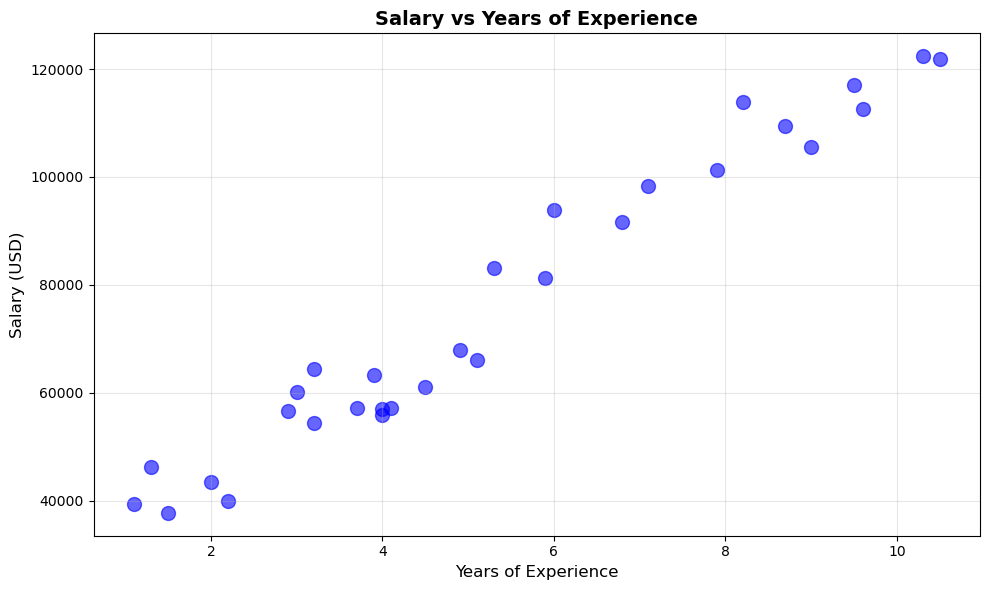

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df_salary['YearsExperience'], df_salary['Salary'], color='blue', alpha=0.6, s=100)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Salary vs Years of Experience', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observation:** There is a clear positive linear relationship between years of experience and salary.

---
### Manual Calculation of Linear Regression

**Simple Linear Regression Equation:**

$$y = mx + c$$

Where:
- $y$ = predicted value (Salary)
- $x$ = feature (YearsExperience)
- $m$ = slope
- $c$ = intercept

**Formulas:**

$$m = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$c = \bar{y} - m\bar{x}$$

Where:
- $\bar{x}$ = mean of x
- $\bar{y}$ = mean of y

In [7]:
X = df_salary['YearsExperience'].values
y = df_salary['Salary'].values

print(f"Number of data points: {len(X)}")

Number of data points: 30


In [8]:
type(X)

numpy.ndarray

In [9]:
x_mean = np.mean(X)
y_mean = np.mean(y)

print(f"Mean of X (Years): {x_mean:.2f}")
print(f"Mean of y (Salary): ${y_mean:,.2f}")

Mean of X (Years): 5.31
Mean of y (Salary): $76,003.00


In [10]:
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)
m = numerator / denominator

print(f"Slope (m): {m:,.2f}")

Slope (m): 9,449.96


In [11]:
c = y_mean - m * x_mean

print(f"Intercept (c): ${c:,.2f}")

Intercept (c): $25,792.20


In [12]:
y_pred_manual = m * X + c

print("First 5 predictions:")
for i in range(5):
    print(f"Experience: {X[i]:.1f} years → Actual: ${y[i]:,.1f}, Predicted: ${y_pred_manual[i]:,.1f}")

First 5 predictions:
Experience: 1.1 years → Actual: $39,343.0, Predicted: $36,187.2
Experience: 1.3 years → Actual: $46,205.0, Predicted: $38,077.2
Experience: 1.5 years → Actual: $37,731.0, Predicted: $39,967.1
Experience: 2.0 years → Actual: $43,525.0, Predicted: $44,692.1
Experience: 2.2 years → Actual: $39,891.0, Predicted: $46,582.1


In [13]:
x = 1.2
y_pred = m * x + c
print(y_pred)

37132.15498441478


### Visualize Regression Line

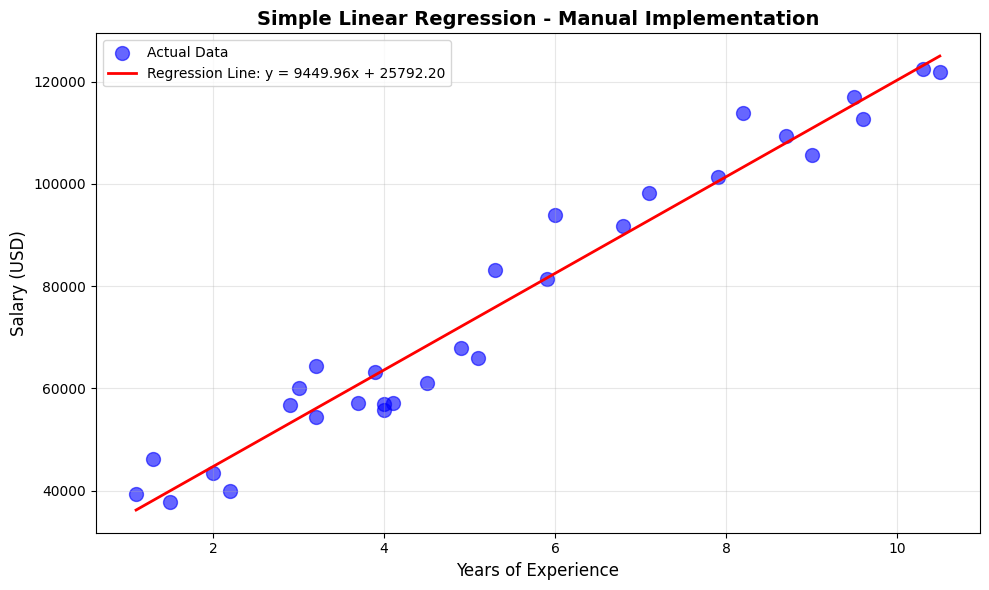

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue', alpha=0.6, s=100, label='Actual Data')

# Regression line
plt.plot(X, y_pred_manual, color='red', linewidth=2, label=f'Regression Line: y = {m:.2f}x + {c:.2f}')

plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.title('Simple Linear Regression - Manual Implementation', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Calculate Evaluation Metrics Manually

In [15]:
mae_manual = np.mean(np.abs(y - y_pred_manual))
print(f"Mean Absolute Error (MAE): ${mae_manual:,.2f}")

Mean Absolute Error (MAE): $4,644.20


In [16]:
mse_manual = np.mean((y - y_pred_manual) ** 2)
print(f"Mean Squared Error (MSE): {mse_manual:,.2f}")

Mean Squared Error (MSE): 31,270,951.72


In [17]:
rmse_manual = np.sqrt(mse_manual)
print(f"Root Mean Squared Error (RMSE): ${rmse_manual:,.2f}\n")

Root Mean Squared Error (RMSE): $5,592.04



In [18]:
ss_res = np.sum((y - y_pred_manual) ** 2)
ss_tot = np.sum((y - y_mean) ** 2)
r2_manual = 1 - (ss_res / ss_tot)

print(f"R² Score: {r2_manual:.4f}")

R² Score: 0.9570


---
# Simple Linear Regression - Using sklearn

Manual calculation is good for understanding, but in practice we use libraries.

**sklearn (scikit-learn)** is the most popular machine learning library in Python. It provides pre-built algorithms for regression, classification, and more.

We'll import `LinearRegression` from sklearn to perform the same task.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [21]:
X_sklearn = X.reshape(-1, 1) # sklearn needs 2D array

print(f"Original X shape: {X.shape}")
print(f"Reshaped X shape: {X_sklearn.shape}")

Original X shape: (30,)
Reshaped X shape: (30, 1)


In [22]:
X_sklearn

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [23]:
X_sklearn = df_salary[['YearsExperience']]  # DataFrame (2D)
X_sklearn

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [24]:
model_simple = LinearRegression()

In [25]:
model_simple.fit(X_sklearn, y)

LinearRegression()

In [26]:
slope_sklearn = model_simple.coef_[0]
intercept_sklearn = model_simple.intercept_

print(f"Slope (m): {slope_sklearn:,.2f}")
print(f"Intercept (c): ${intercept_sklearn:,.2f}")

Slope (m): 9,449.96
Intercept (c): $25,792.20


In [27]:
print(f"Slope - Manual: {m:,.2f} | sklearn: {slope_sklearn:,.2f}")
print(f"Intercept - Manual: ${c:,.2f} | sklearn: ${intercept_sklearn:,.2f}")

Slope - Manual: 9,449.96 | sklearn: 9,449.96
Intercept - Manual: $25,792.20 | sklearn: $25,792.20


In [28]:
y_pred_sklearn = model_simple.predict(X_sklearn)

print("First 5 predictions (sklearn):")
for i in range(5):
    print(f"Experience: {X[i]:.1f} years → Actual: ${y[i]:,.0f}, Predicted: ${y_pred_sklearn[i]:,.0f}")

First 5 predictions (sklearn):
Experience: 1.1 years → Actual: $39,343, Predicted: $36,187
Experience: 1.3 years → Actual: $46,205, Predicted: $38,077
Experience: 1.5 years → Actual: $37,731, Predicted: $39,967
Experience: 2.0 years → Actual: $43,525, Predicted: $44,692
Experience: 2.2 years → Actual: $39,891, Predicted: $46,582


In [29]:
new_experience = np.array([0, 3, 7, 12, 15]).reshape(-1, 1)
predicted_salaries = model_simple.predict(new_experience)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
predicted_salaries

array([ 25792.20019867,  54142.08716303,  91941.93644885, 139191.74805613,
       167541.63502049])

In [31]:
print(f"{'Years':<10} {'Predicted Salary':<20}")
print("="*30)
for exp, sal in zip(new_experience.flatten(), predicted_salaries):
    print(f"{exp:<10.0f} ${sal:>11,.2f}")

Years      Predicted Salary    
0          $  25,792.20
3          $  54,142.09
7          $  91,941.94
12         $ 139,191.75
15         $ 167,541.64


### Evaluate Model Performance

To measure how good our model is, we need evaluation metrics.

sklearn provides these metrics in the `metrics` module:

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)


print(f"MAE: ${mae_sklearn:,.2f}")
print(f"MSE: {mse_sklearn:,.2f}")
print(f"RMSE: ${rmse_sklearn:,.2f}")
print(f"R² Score: {r2_sklearn:.4f}")

MAE: $4,644.20
MSE: 31,270,951.72
RMSE: $5,592.04
R² Score: 0.9570


---
# Multiple Linear Regression

## Medical Insurance Cost Dataset

This dataset contains medical insurance billing information from 1,338 individuals in the United States, recording their health insurance costs and related attributes.

**charges** = The total medical costs (in USD) billed by the insurance company for an individual per year.


In [34]:
df_insurance = pd.read_csv('/kaggle/input/datasets/mirichoi0218/insurance/insurance.csv')

print(f"Dataset shape: {df_insurance.shape}")
df_insurance.head(3)

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [35]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [36]:
X_multiple = df_insurance[['age', 'bmi', 'children']]
y_multiple = df_insurance['charges']

print(f"Features shape: {X_multiple.shape}")
print(f"Target shape: {y_multiple.shape}")

Features shape: (1338, 3)
Target shape: (1338,)


In [37]:
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y_multiple)

LinearRegression()

In [38]:
intercept = model_multiple.intercept_
coefficients = model_multiple.coef_

print(f"Model Equation:")
print(f"charges = {intercept:.2f} + {coefficients[0]:.2f}×age + {coefficients[1]:.2f}×bmi + {coefficients[2]:.2f}×children")


Model Equation:
charges = -6916.24 + 239.99×age + 332.08×bmi + 542.86×children


In [39]:
y_pred = model_multiple.predict(X_multiple)

print("First 5 predictions on test set:")
print(f"{'Actual':<15} {'Predicted':<15} {'Error':<15}")
print("="*45)
for i in range(5):
    actual = y_multiple.iloc[i]
    predicted = y_pred[i]
    error = abs(actual - predicted)
    print(f"${actual:<14,.2f} ${predicted:<14,.2f} ${error:<14,.2f}")

First 5 predictions on test set:
Actual          Predicted       Error          
$16,884.92      $6,908.78       $9,976.15      
$1,725.55       $9,160.98       $7,435.42      
$4,449.46       $12,390.95      $7,941.48      
$21,984.47      $8,543.53       $13,440.94     
$3,866.86       $10,354.15      $6,487.29      


In [40]:
r2 = r2_score(y_multiple, y_pred)


print(r2)

0.12009819576246927
